### Problem with Enoder and Decder Architechure


The **traditional encoder–decoder architecture** (without attention) uses an RNN/LSTM encoder to convert the entire input sequence into a **single fixed-length context vector**, which is then passed to the decoder to generate the output sequence.

This design causes several serious problems.


## 1️. Fixed-Length Context Vector Problem (Main Limitation)

###  What happens?

* The encoder processes the entire input sentence
* Only the **final hidden state** is passed to the decoder as the context vector

```
Input sentence → Encoder → Single context vector → Decoder
```

###  Why is this a problem?

* One vector must store **all information** about the sentence:

  * Meaning
  * Grammar
  * Word order
  * Long-range dependencies
* This becomes extremely difficult for long sentences

###  Example:

```
"I saw the man who was standing near the building with a blue shirt"
```

Important information from the beginning of the sentence gets **compressed or lost**.

###  Result:

* Information loss
* Poor translation quality for long sentences



## 2️. Information Bottleneck Problem

### Problem

The encoder creates an **information bottleneck** by forcing all semantic and syntactic details into a single vector.

### Why it’s harmful:

* As sentence length increases:

  * Encoder capacity remains fixed
  * Information loss increases

This bottleneck limits the model’s performance regardless of how powerful the decoder is.


## 3️. No Direct Access to Encoder States During Decoding

###  What happens?

* Decoder receives **only one context vector**
* Encoder hidden states at different time steps are discarded

###  Why is this bad?

* Decoder cannot revisit earlier words
* Decoder cannot adjust focus based on the current output word

 The decoder is essentially **working blindly** after encoding.



## 4️. Lack of Word-to-Word Alignment

###  Problem

* The model does not explicitly know:

  * Which input word corresponds to which output word

Example:

```
English → Hindi
"meet" → "मिलकर"
```

Without attention:

* Decoder guesses alignment implicitly
* Leads to incorrect or misplaced translations



## 5️. Same Context Used for Every Decoder Time Step

###  What happens?

* The decoder uses the **same context vector** at every time step

###  Why is this incorrect?

Each output word should depend on **different parts of the input**.

Example:

| Output Word | Relevant Input  |
| ----------- | --------------- |
| "आपसे"      | "nice"          |
| "मिलकर"     | "meet"          |
| "खुशी"      | "happy"         |
| "हुई"       | tense / grammar |

Using the same context for all steps limits flexibility.


## 6. Performance Degrades for Long Sentences

### Observed in practice:

* Translation accuracy drops as input length increases
* BLEU score decreases
* Model struggles with:

  * Long-range dependencies
  * Complex sentence structures

This made basic encoder–decoder models impractical for real-world translation tasks.



# Why Attention Mechanism Was Introduced

To solve these problems, **attention mechanism** was introduced.

### Key Idea:

> Instead of relying on a single context vector, allow the decoder to dynamically focus on different parts of the input sequence at each decoding step.


##  How Attention Solves the Problems

| Encoder–Decoder Problem | Attention Solution                    |
| ----------------------- | ------------------------------------- |
| Fixed-length context    | Dynamic context per step              |
| Information bottleneck  | Weighted access to all encoder states |
| No alignment            | Soft word-to-word alignment           |
| Same context every step | Different focus at each step          |
| Long sentence failure   | Access to full input sequence         |



##  Core Attention Formula (Conceptual)

For decoder step **t**:

```
Context vector cₜ = Σ αₜᵢ · hᵢ
```

Where:

* `hᵢ` = encoder hidden states
* `αₜᵢ` = attention weights (importance scores)




### The What

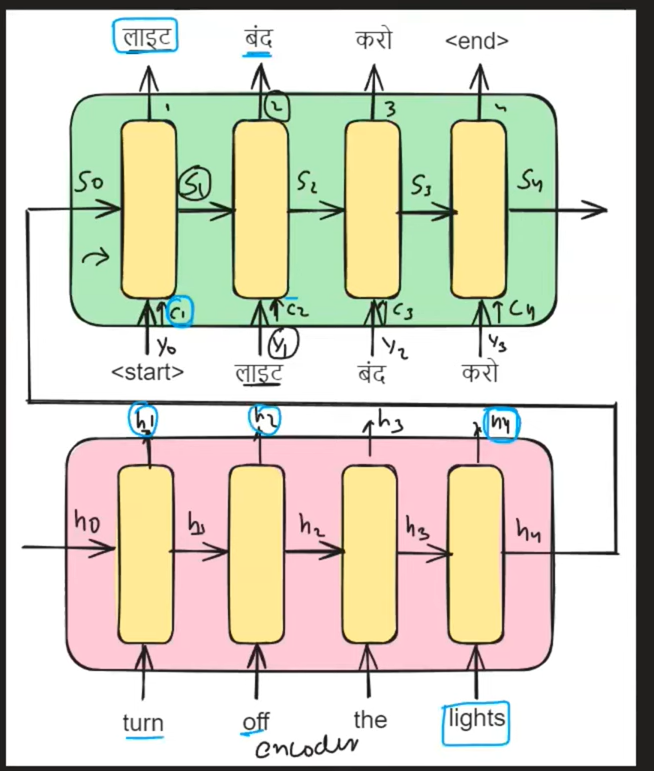
before knowing what:
- we have in encoder : input state :[x1,x2,x3,x4]
- we have in encoder : hidden state - [h0,h1,h2,h3]
- after process the encoder we have h5 and we used hidden state decoder as h in paper h5 = s0
- so we have internal state(hidden state) - [s0,s1,s2,s3,s4]
- the input in decoder : [y0,y1,y2,y3]

for example:
- we have input of decoder :[y1,s1] -  it is in encoder to decoder
- but in attention mechanisum : we need give one more input  as ci:[c1,c2,c3,c4]
- ci - attention input
- in vanialla encoder to decoder - we give encoder - input should be [yi-1,si-1]
- but in attention mechanisium we give - input = [yi-1,si-1,ci],ci-attention input

### about ci
- ci is vector 
- ci is current decoder time step which encoder hidden state is useful
- example:  to predict "turn" to hindi we magically know the h1 decoder is suitable so h1 gave to the ci,for another word h2,h3 are so we give to the ci

- sometime one h or sometime  2 h
- dimesion of ci == dimesion of hi
- for two h we do weighted sum
- c work like context of the word to give to the every time step

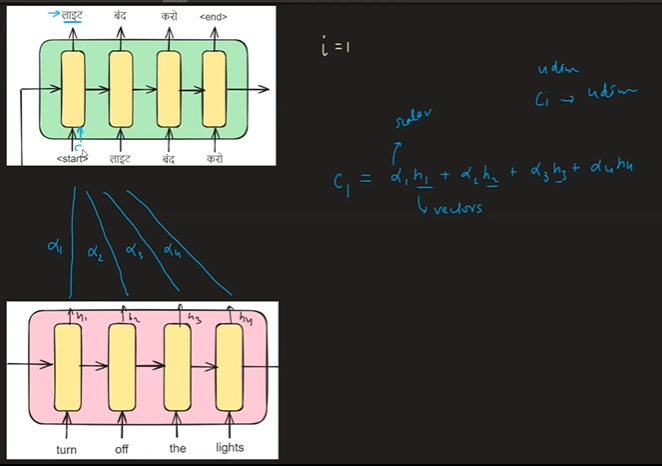,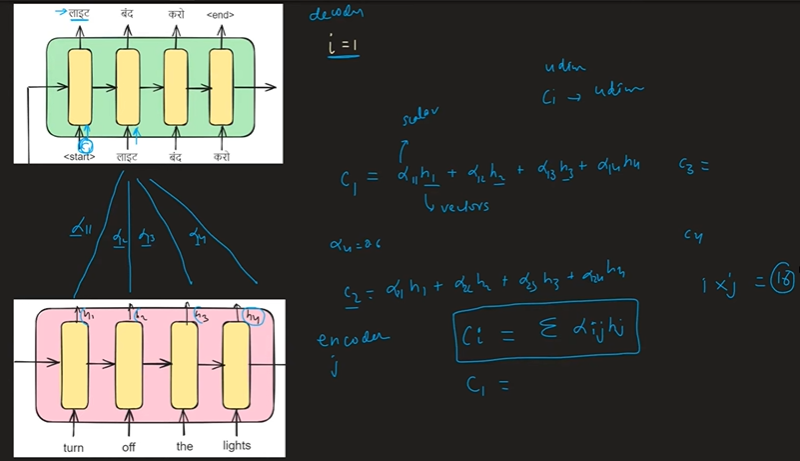
to finding which hidden state useful for ci
- attention mechanisim assign weights to the all hidden state
- example: to predict the word
  - c1 = alpha11(h1) + alpha12(h2) + alpha13(h3) + alpha14(h4)
  - like that it calculate upto  c4 with all dimesion

## how to find alphas

alpha - it is also called similariety vector
### Example: to i=2 decoder finding alph21
- alpha21 is depend on h1 as well as s1(previous hidden state of decodr)
- alpha21 = f(h1,s1) ,general function aphphaij = f(hj,si-1)
- alpha23 - f(h3,s1)